In [8]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix, precision_recall_curve, auc, roc_curve, classification_report, accuracy_score
from tabulate import tabulate
import joblib


In [2]:
RANDOM_SEED = 42

os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)

random.seed(RANDOM_SEED)

np.random.seed(RANDOM_SEED)

In [3]:
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)

X_train = mitbih_train.iloc[:, :-1].values
y_train = mitbih_train.iloc[:, -1].values
X_test = mitbih_test.iloc[:, :-1].values
y_test = mitbih_test.iloc[:, -1].values

In [4]:
def print_avg_and_mean(dict):
    # Ponderado
    weighted_avg_precision = dict['weighted avg']['precision']
    weighted_avg_recall = dict['weighted avg']['recall']
    weighted_avg_f1_score = dict['weighted avg']['f1-score']
    weighted_avg_support = dict['weighted avg']['support']

    # Aritmético
    mean_precision = np.mean([dict[label]["precision"] for label in dict.keys() if label != "accuracy"])
    mean_recall = np.mean([dict[label]["recall"] for label in dict.keys() if label != "accuracy"]
    )
    mean_f1_score = np.mean([dict[label]["f1-score"] for label in dict.keys() if label != "accuracy"])
    mean_support = np.mean([dict[label]["support"] for label in dict.keys() if label != "accuracy"])

    print(f'Média Ponderada - Precisão: {weighted_avg_precision}')
    print(f'Média Ponderada - Recall: {weighted_avg_recall}')
    print(f'Média Ponderada - F1-Score: {weighted_avg_f1_score}')
    print(f'Média Ponderada - Support: {weighted_avg_support}')
    print('--------------------------------------------------')
    print(f'Média Aritmética - Precisão: {mean_precision}')
    print(f'Média Aritmética - Recall: {mean_recall}')
    print(f'Média Aritmética - F1-Score: {mean_f1_score}')
    print(f'Média Aritmética - Support: {mean_support}')

Treino: 87554
Teste:  21892
Total: 109446


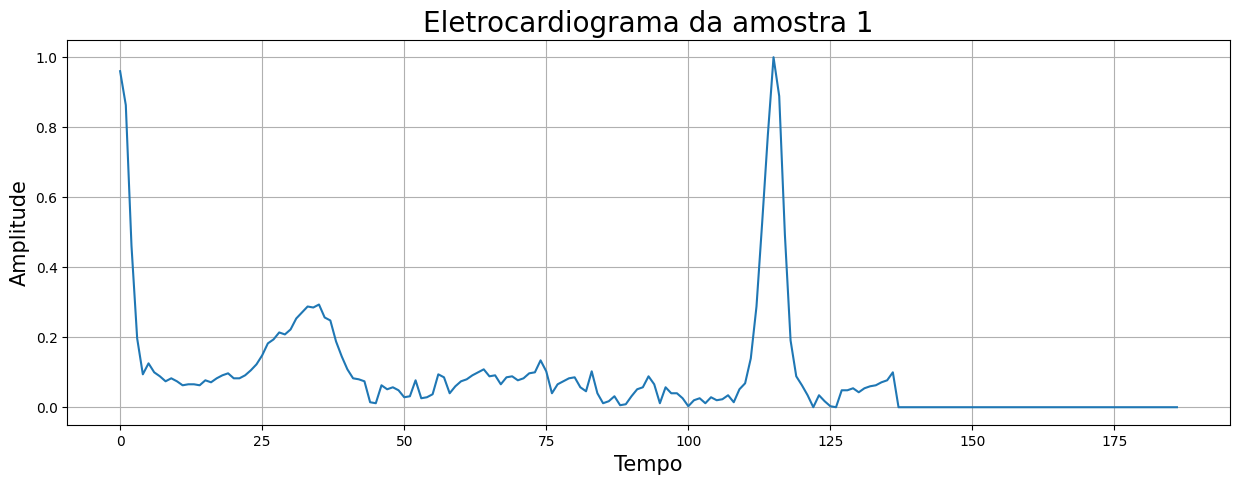

[0. 1. 2. 3. 4.]


In [5]:
index = 1
ecg_sample = X_train[index]
print('Treino:', len(X_train))
print("Teste: ", len(X_test))
print('Total:', len(X_train) + len(X_test))

plt.figure(figsize=(15, 5))
plt.plot(ecg_sample)
plt.title(f'Eletrocardiograma da amostra {index}', fontsize=20)
plt.xlabel('Tempo', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.grid(True)
plt.show()
print(np.unique(y_train))

# n_neighbors

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
from sklearn.metrics import accuracy_score

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo KNN: {accuracy:.2f}")

Acurácia do modelo KNN: 0.98


In [24]:
knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred2 = knn_model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Acurácia do modelo KNN: {accuracy2:.2f}")

Acurácia do modelo KNN: 0.97


In [26]:
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

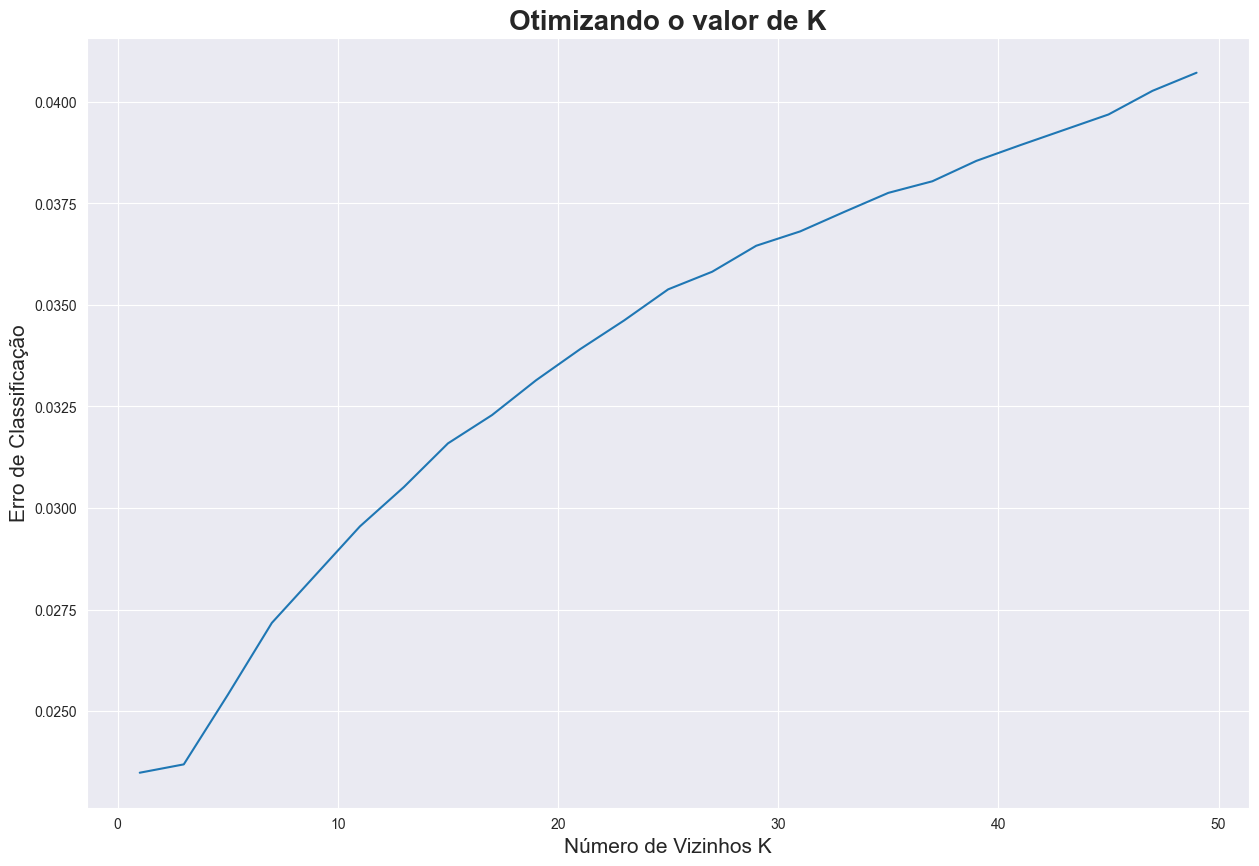

In [36]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Otimizando o valor de K', fontsize=20, fontweight='bold')
plt.xlabel('Número de Vizinhos K', fontsize=15)
plt.ylabel('Erro de Classificação', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [37]:
best_k = k_list[MSE.index(min(MSE))]
print(f"O melhor valor de K é {best_k}")

O melhor valor de K é 1


In [131]:
k_list = list(range(1,1000,2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

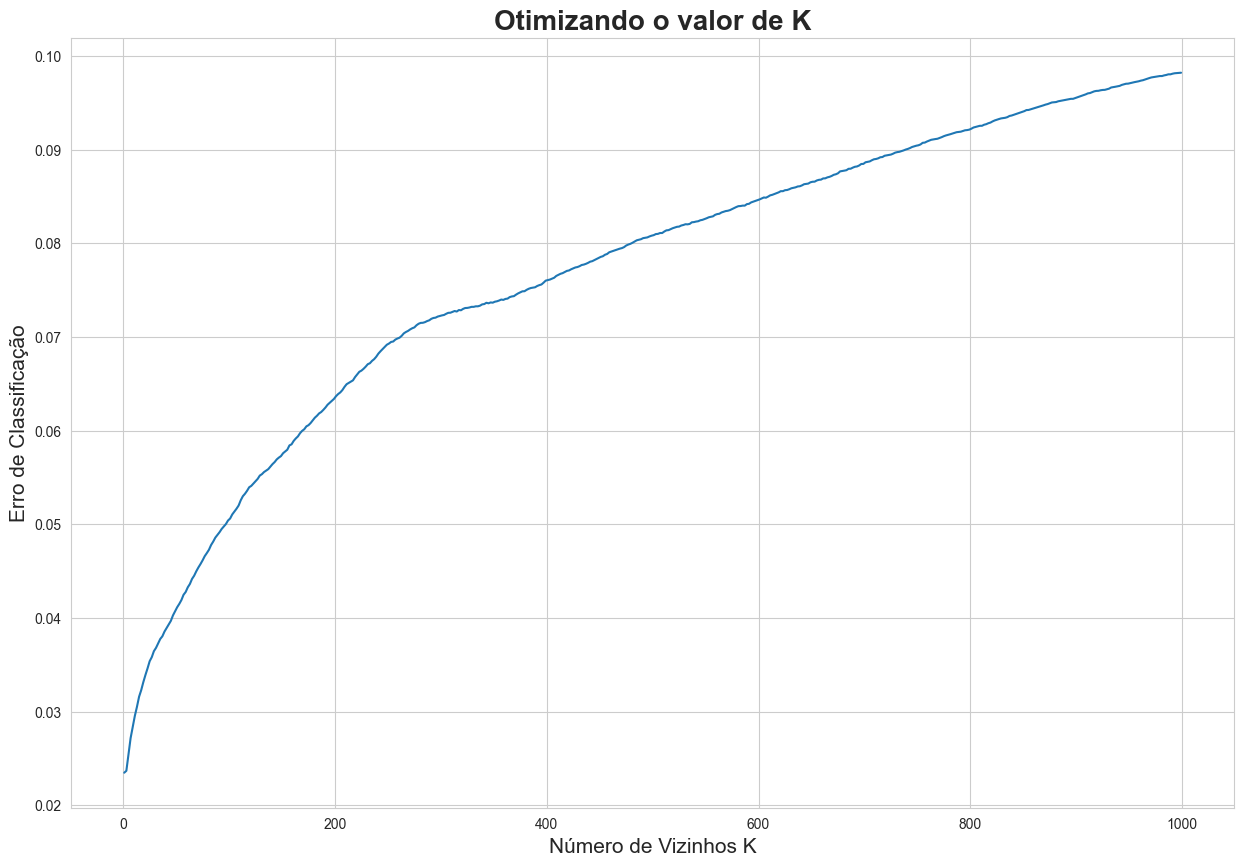

In [41]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Otimizando o valor de K', fontsize=20, fontweight='bold')
plt.xlabel('Número de Vizinhos K', fontsize=15)
plt.ylabel('Erro de Classificação', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

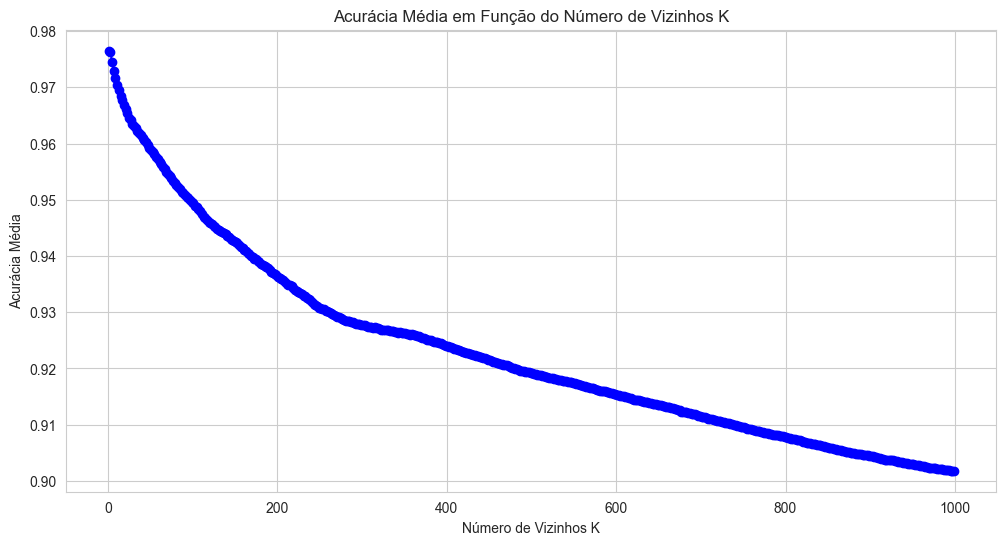

In [132]:
plt.figure(figsize=(12, 6)) 
plt.plot(k_list, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Acurácia Média em Função do Número de Vizinhos K')
plt.xlabel('Número de Vizinhos K')
plt.ylabel('Acurácia Média')  
plt.grid(True)
plt.show()


In [42]:
best_k = k_list[MSE.index(min(MSE))]
print(f"O melhor valor de K é {best_k}")

O melhor valor de K é 1


# weights
<ul>
<li>‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.</li>

<li>‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.</li>
</ul>

In [101]:
knn_uniform = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores_uniform = cross_val_score(knn_uniform, X_train, y_train, cv=10, scoring='accuracy').mean()
scores_distance = cross_val_score(knn_distance, X_train, y_train, cv=10, scoring='accuracy').mean()

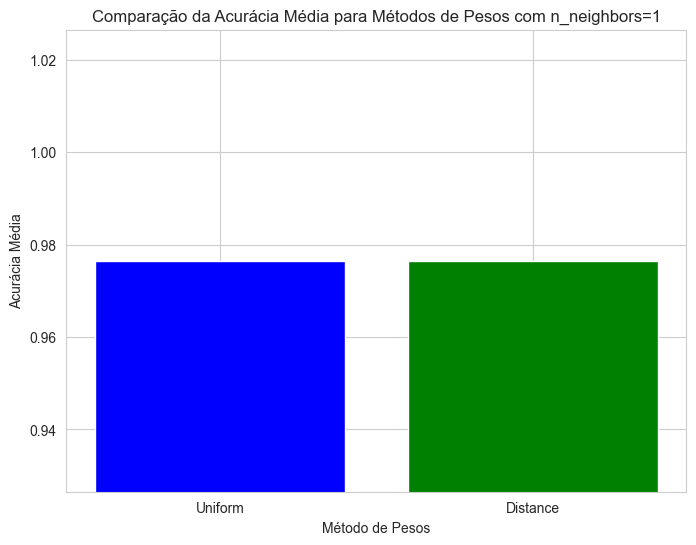

In [103]:
weights_methods = ['Uniform', 'Distance']
scores = [scores_uniform, scores_distance]

plt.figure(figsize=(8, 6))
plt.bar(weights_methods, scores, color=['blue', 'green'])
plt.xlabel('Método de Pesos')
plt.ylabel('Acurácia Média')
plt.title('Comparação da Acurácia Média para Métodos de Pesos com n_neighbors=1')
plt.ylim([min(scores) - 0.05, max(scores) + 0.05])
plt.show()

In [106]:
if scores_uniform > scores_distance:
    best_weight = 'uniform'
    best_accuracy = scores_uniform
else:
    best_weight = 'distance'
    best_accuracy = scores_distance

print(f"O melhor método de pesos é '{best_weight}' com uma acurácia média de {best_accuracy:.3f}")

O melhor método de pesos é 'distance' com uma acurácia média de 0.977


# algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
### <ul> 
<li>‘ball_tree’ will use BallTree</li>

<li> ‘kd_tree’ will use KDTree</li>

<li> ‘brute’ will use a brute-force search.</li>

<li> ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method. </li>
</ul>

In [105]:
knn_auto = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='auto')
knn_ball_tree = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='ball_tree')
knn_kd_tree = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='kd_tree')
knn_brute = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='brute')

scores_auto = cross_val_score(knn_auto, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
scores_ball_tree = cross_val_score(knn_ball_tree, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
scores_kd_tree = cross_val_score(knn_kd_tree, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()
scores_brute = cross_val_score(knn_brute, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1).mean()

In [112]:
'''
print(f"Acurácia média para 'auto': {scores_auto:.3f}")
print(f"Acurácia média para 'ball_tree': {scores_ball_tree:.3f}")
print(f"Acurácia média para 'kd_tree': {scores_kd_tree:.3f}")
print(f"Acurácia média para 'brute': {scores_brute:.3f}")
'''
best_accuracy = 0
best_weight = ''

if scores_auto > best_accuracy:
    best_weight = 'Auto'
    best_accuracy = scores_auto
elif scores_ball_tree > best_accuracy:
    best_weight = 'Ball Tree'
    best_accuracy = scores_ball_tree
elif scores_kd_tree > best_accuracy:
    best_weight = 'KD Tree'
    best_accuracy = scores_kd_tree
elif scores_brute > best_accuracy:
    best_weight = 'Brute'
    best_accuracy = scores_brute

print(f"O melhor método de pesos é '{best_weight}' com uma acurácia média de {best_accuracy:.3f}")

O melhor método de pesos é 'Auto' com uma acurácia média de 0.977


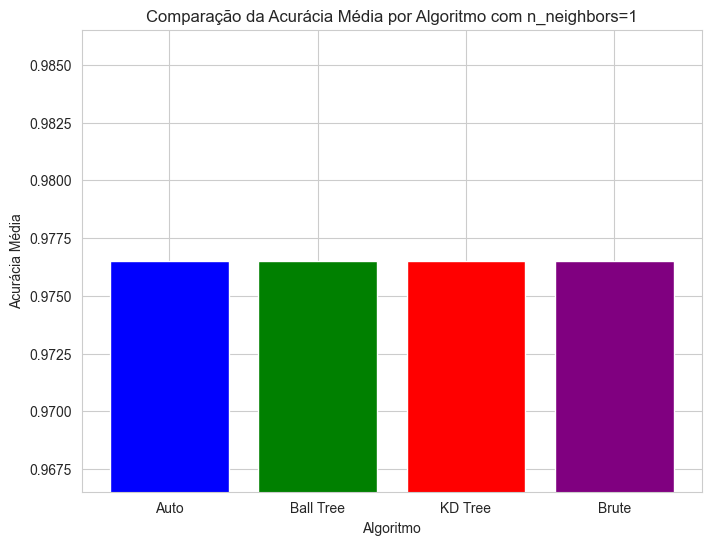

In [118]:
algorithms = ['Auto', 'Ball Tree', 'KD Tree', 'Brute']
scores = [scores_auto, scores_ball_tree, scores_kd_tree, scores_brute]

plt.figure(figsize=(8, 6))
plt.bar(algorithms, scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia Média')
plt.title('Comparação da Acurácia Média por Algoritmo com n_neighbors=1')
plt.ylim([min(scores) - 0.01, max(scores) + 0.01])
plt.show()


# leaf_sizeint, default=30

Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

In [119]:
k_list = list(range(1,100,2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=1, weights='distance', algorithm='ball_tree', leaf_size=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [125]:
print(cv_scores)

[0.9765173369573583, 0.9765173369573583, 0.9765173369573583, 0.9765173369573583, 0.9765173369573583, 0.9765173369573583, 0.9765173369573583]


In [124]:
if scores:
    MSE = [1 - x for x in scores]
    min_error_index = MSE.index(min(MSE))
    best_leaf_size = filtered_k_list[min_error_index]
    best_error = MSE[min_error_index]

    print(f"O melhor leaf_size é {best_leaf_size} com um erro de classificação de {best_error:.3f}")
else:
    print("Não há resultados válidos para análise.")


O melhor leaf_size é 1 com um erro de classificação de 0.023


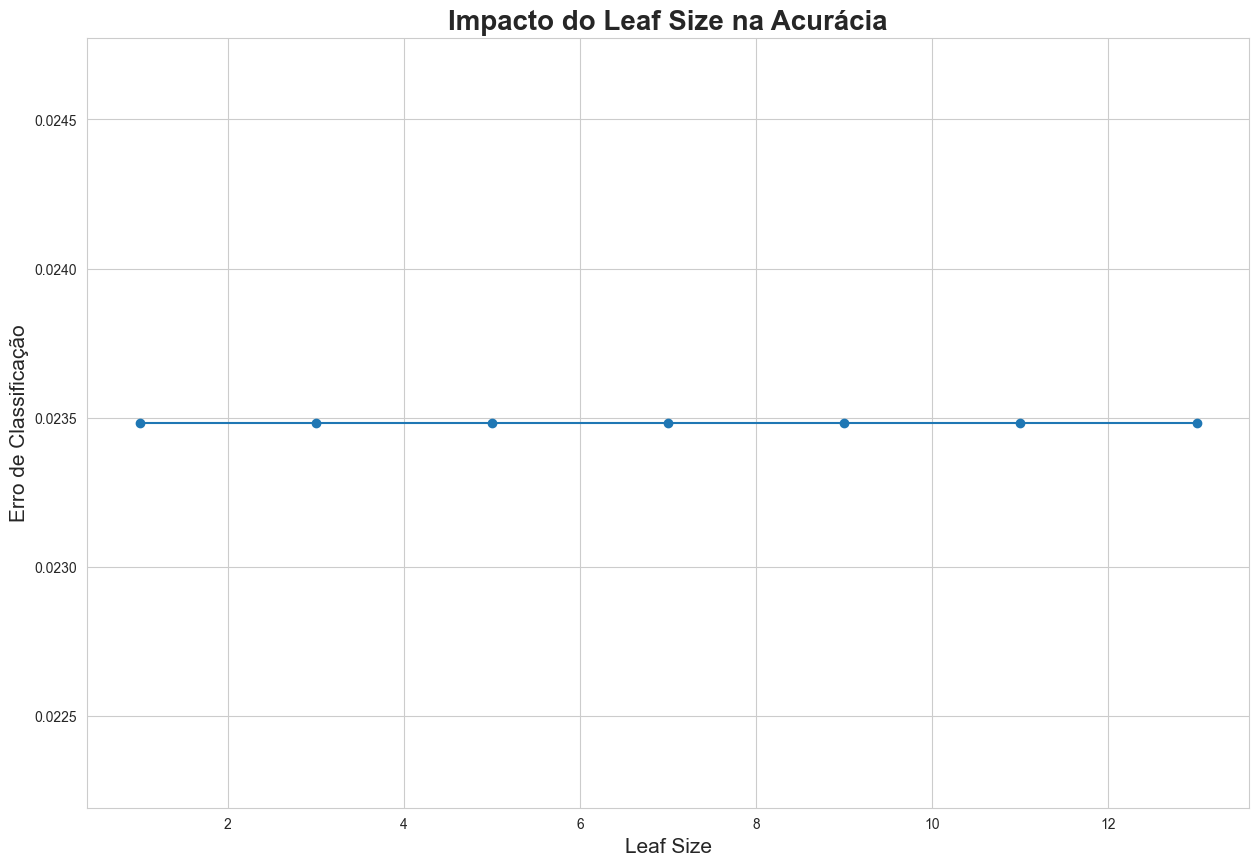

In [128]:
if scores:
    plt.figure(figsize=(15,10))
    plt.plot(filtered_k_list, MSE, marker='o')
    plt.title('Impacto do Leaf Size na Acurácia', fontsize=20, fontweight='bold')
    plt.xlabel('Leaf Size', fontsize=15)
    plt.ylabel('Erro de Classificação', fontsize=15)
    sns.set_style("whitegrid")
    plt.show()
else:
    print("Não há dados suficientes para a plotagem.")


In [9]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

param_grid = {
    'kneighborsclassifier__n_neighbors': [1],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__leaf_size': [20, 30, 40, 50]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

y_pred = grid_search.predict(X_test)
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

Melhores hiperparâmetros: {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__leaf_size': 20, 'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.83      0.74      0.78       556
         2.0       0.94      0.93      0.93      1448
         3.0       0.74      0.69      0.71       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.90      0.86      0.88     21892
weighted avg       0.98      0.98      0.98     21892



In [11]:
print_avg_and_mean(classification_report_dict)

Média Ponderada - Precisão: 0.9764464756953443
Média Ponderada - Recall: 0.9770692490407454
Média Ponderada - F1-Score: 0.9766553539450085
Média Ponderada - Support: 21892.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9089821023352478
Média Aritmética - Recall: 0.8783227560248721
Média Aritmética - F1-Score: 0.8928985027882306
Média Aritmética - Support: 9382.285714285714


# Final:


In [10]:
knn_model = KNeighborsClassifier()

knn_model = knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

print_avg_and_mean(classification_report_dict)

Média Ponderada - Precisão: 0.9727456417070396
Média Ponderada - Recall: 0.9736433400328888
Média Ponderada - F1-Score: 0.9724937005444435
Média Ponderada - Support: 21892.0
--------------------------------------------------
Média Aritmética - Precisão: 0.922618999041985
Média Aritmética - Recall: 0.8461745483962341
Média Aritmética - F1-Score: 0.8795240378565231
Média Aritmética - Support: 9382.285714285714


In [12]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo carregado: {accuracy:.3f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do modelo carregado: 0.974
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.90      0.64      0.75       556
         2.0       0.94      0.90      0.92      1448
         3.0       0.76      0.64      0.69       162
         4.0       0.99      0.95      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.91      0.82      0.86     21892
weighted avg       0.97      0.97      0.97     21892



In [13]:
pipeline_best = make_pipeline(StandardScaler(), KNeighborsClassifier(algorithm='auto', leaf_size=20, n_neighbors=1, p=1, weights='uniform'))

pipeline_best.fit(X_train, y_train)

y_pred_best = pipeline_best.predict(X_test)

classification_report_dict_best = classification_report(y_test, y_pred_best, output_dict=True)

print_avg_and_mean(classification_report_dict_best)

Média Ponderada - Precisão: 0.9764464756953443
Média Ponderada - Recall: 0.9770692490407454
Média Ponderada - F1-Score: 0.9766553539450085
Média Ponderada - Support: 21892.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9089821023352478
Média Aritmética - Recall: 0.8783227560248721
Média Aritmética - F1-Score: 0.8928985027882306
Média Aritmética - Support: 9382.285714285714


In [15]:
knn_model = KNeighborsClassifier()

params = {
    'n_neighbors': [1],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40, 50]
}

grid_search = GridSearchCV(knn_model, params, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f"Melhores hiperparâmetros: {grid_search.best_params_}")

y_pred = grid_search.predict(X_test)
classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

print(classification_report(y_test, y_pred))

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.84      0.74      0.78       556
         2.0       0.94      0.92      0.93      1448
         3.0       0.75      0.70      0.72       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.90      0.87      0.88     21892
weighted avg       0.98      0.98      0.98     21892



In [16]:
y_pred_best = pipeline_best.predict(X_test)
y_pred_prob_best = pipeline_best.predict_proba(X_test)

classification_report_dict_best = classification_report(y_test, y_pred_best, output_dict=True)

In [19]:
roc_auc_score_best = roc_auc_score(y_test, y_pred_prob_best, multi_class='ovr')
log_loss_best = log_loss(y_test, y_pred_prob_best)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_best[:, 1], pos_label=1)
pr_auc_score_best = auc(recall, precision)

print(f'ROC-AUC: {roc_auc_score_best:.3f}')
print(f'PR-AUC: {pr_auc_score_best:.3f}')
print(f'Log Loss: {log_loss_best:.3f}')

ROC-AUC: 0.923
PR-AUC: 0.787
Log Loss: 0.827


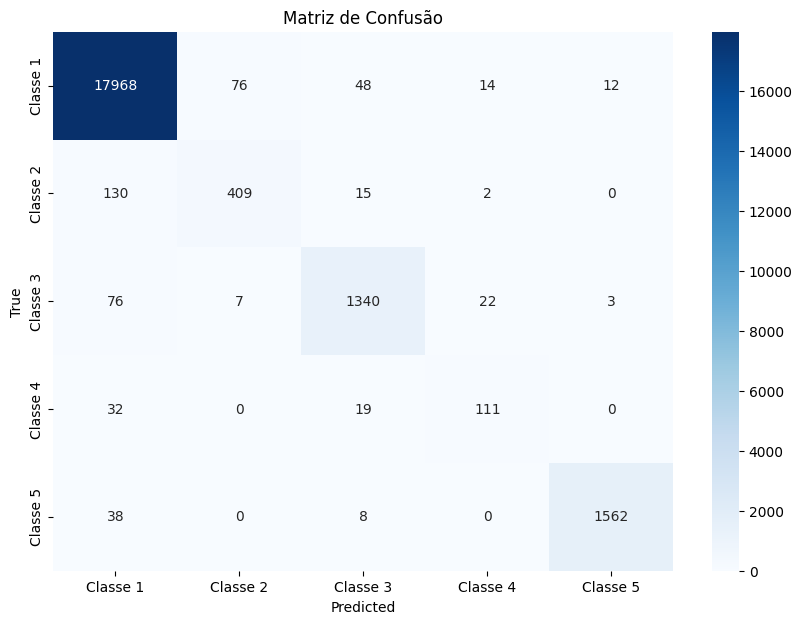

In [20]:
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusão')
plt.show()

In [21]:
print_avg_and_mean(classification_report_dict_best)

Média Ponderada - Precisão: 0.9764464756953443
Média Ponderada - Recall: 0.9770692490407454
Média Ponderada - F1-Score: 0.9766553539450085
Média Ponderada - Support: 21892.0
--------------------------------------------------
Média Aritmética - Precisão: 0.9089821023352478
Média Aritmética - Recall: 0.8783227560248721
Média Aritmética - F1-Score: 0.8928985027882306
Média Aritmética - Support: 9382.285714285714


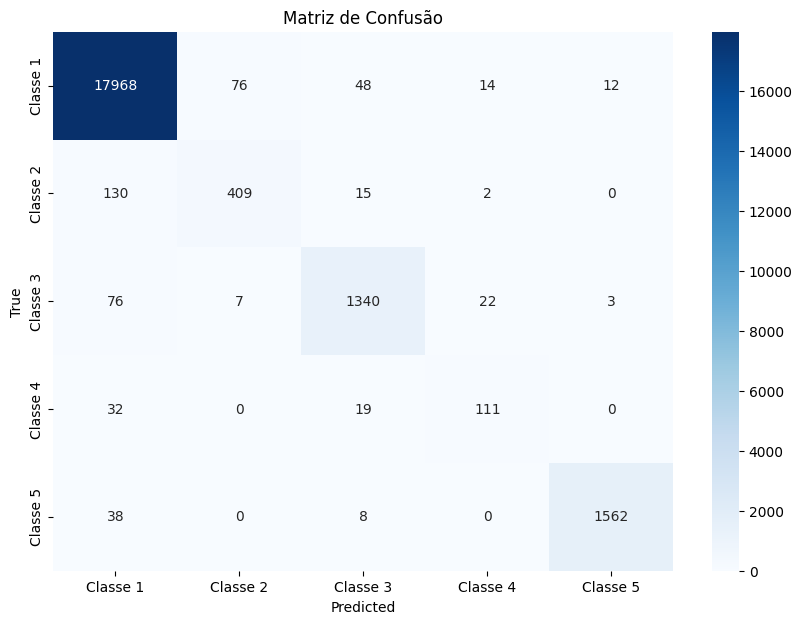

In [22]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='g', cmap='Blues', xticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'], yticklabels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Matriz de Confusão')
plt.show()

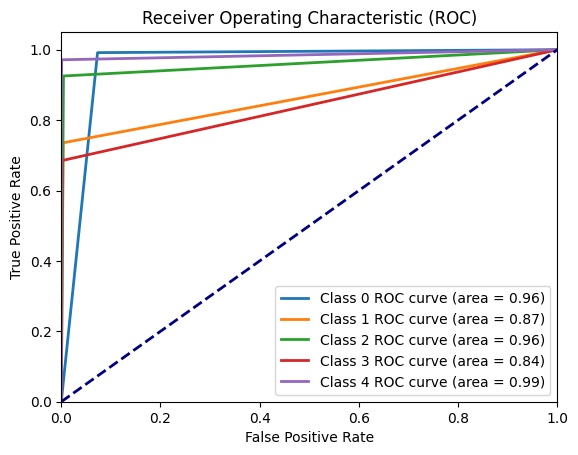

In [25]:
n_classes = len(set(y_test))
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob_best[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [31]:
joblib.dump(pipeline_best, 'knn.joblib')

['knn.joblib']

In [5]:
best_pipeline = joblib.load('knn.joblib')

In [6]:
y_pred_best = best_pipeline.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Acurácia do modelo carregado: {accuracy:.3f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo carregado: 0.977
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.83      0.74      0.78       556
         2.0       0.94      0.93      0.93      1448
         3.0       0.74      0.69      0.71       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.90      0.86      0.88     21892
weighted avg       0.98      0.98      0.98     21892

